<a href="https://colab.research.google.com/github/jadrzy/Lab-Python-in-Data-Science-/blob/main/notebooks/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone git repository**



In [1]:
!git clone https://{token}@github.com/jadrzy/Lab-Python-in-Data-Science-.git

Cloning into 'Lab-Python-in-Data-Science-'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 121 (delta 37), reused 77 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (121/121), 651.55 KiB | 3.56 MiB/s, done.
Resolving deltas: 100% (37/37), done.


**Import dataset and setup enviroment**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,)
from sklearn.decomposition import PCA
data = pd.read_csv('/content/Lab-Python-in-Data-Science-/datasets/winequality-red.csv', sep = ';') # When data separator needed

---
---
---
#**Task 3.1**
Load the dataset. Split it for train, validation, and test sets with a ratio of
0.6:0.2:0.2. Set the random_state parameter to 1. Plot the correlation matrix. Enable
annotations, and choose a suitable colormap. In pairs, discuss which features would be
useful for predicting the levels of density and pH. Justify your choices.





In [8]:
tr_data = []  # training data   60%
val_data = [] # validation data 20%
te_data = []  # test data       20%

tr_data, val_data = train_test_split(data, test_size=0.2, random_state=1)
tr_data, te_data = train_test_split(tr_data, test_size=0.25, random_state=1)

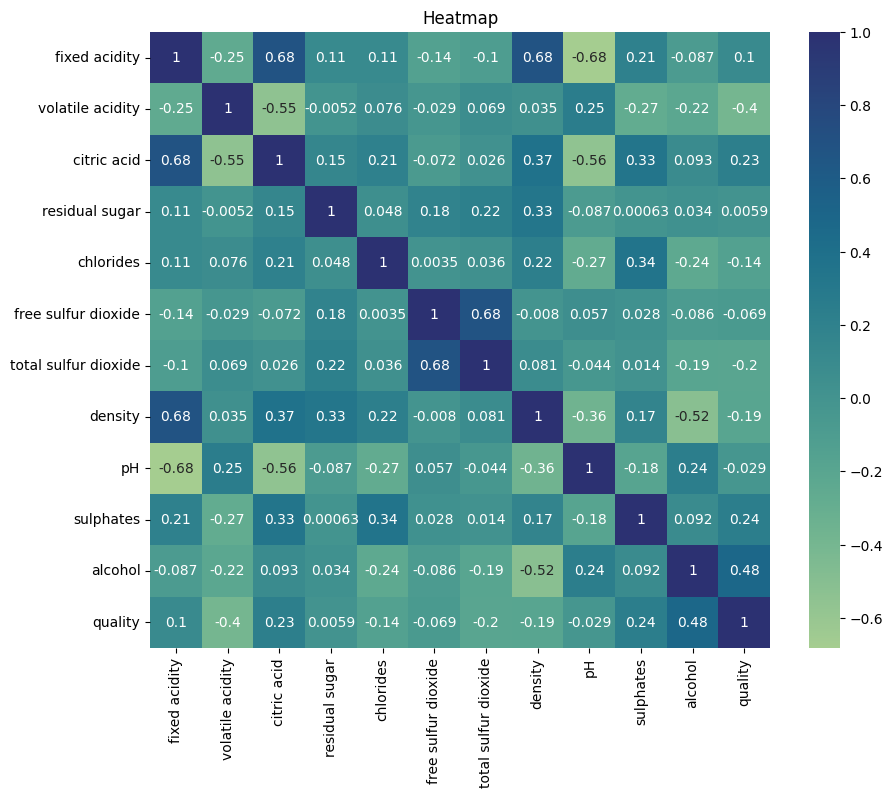

In [ ]:
corr = tr_data.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, cmap='crest', annot=True)
heatmap.set_title('Heatmap')
plt.show()

The best features to predict ph and density levels are:

Density

*   Total sulfur dioxide or free sulfur dioxide
*   Sulphates
*   Alcohol
*   Volatile accidity

They have high correlation coefficien in respect the target which makes prediction easier.






---
#**Task 3.2**
Repeat task 3.1 for the white wine dataset. Consider differences.

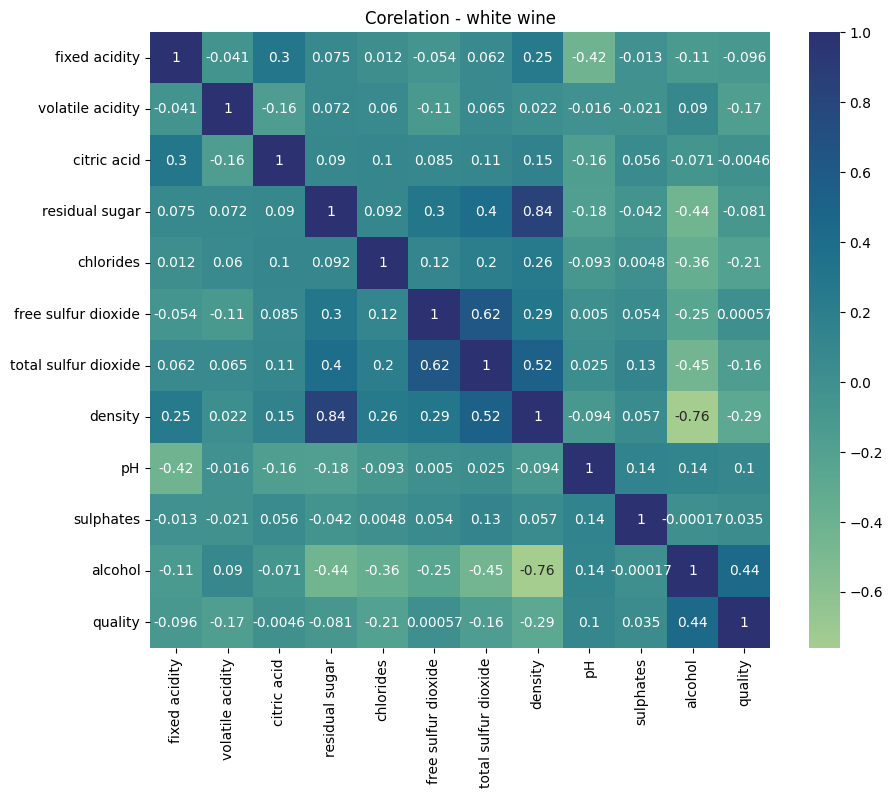

In [5]:
data_w = pd.read_csv('/content/Lab-Python-in-Data-Science-/datasets/winequality-white.csv', sep = ';') # When data separator needed
tr_data_w = []  # training data   60%
val_data_w = [] # validation data 20%
te_data_w = []  # test data       20%

tr_data_w, val_data_w = train_test_split(data_w, test_size=0.2, random_state=1)
tr_data_w, te_data_w = train_test_split(tr_data_w, test_size=0.25, random_state=1)

corr_w = tr_data_w.corr()
plt.figure(figsize=(10, 8))
heatmap_w = sns.heatmap(corr_w, cmap='crest', annot=True)
heatmap_w.set_title('Corelation - white wine')
plt.show()

The best features t predict ph are:
*   fixed acidity

The best features t predict density are:

*   residual sugar
*   total sulfur dioxide
*   alcohol

There is a difference between feature corelation of those two wine sets.


---
#**Task 3.3**
Exclude 1% of observations with the lowest and highest pH. Compare the
distribution of this feature before and after this operation.

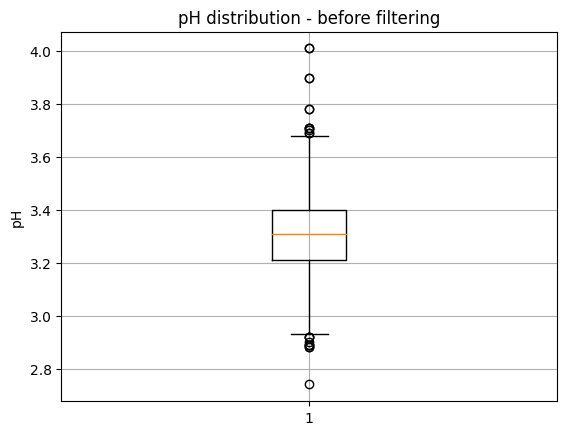

In [ ]:
pH = tr_data['pH']
plt.boxplot(pH)
plt.title('pH distribution - before filtering')
plt.ylabel('pH')
plt.grid()
plt.show()

In [ ]:
q_low = tr_data['pH'].quantile(0.1) # get 1st percentile
q_hi = tr_data['pH'].quantile(0.99) # get 99th percentile
data_filtered = tr_data[(tr_data['pH'] < q_hi) & (tr_data['pH'] > q_low)]

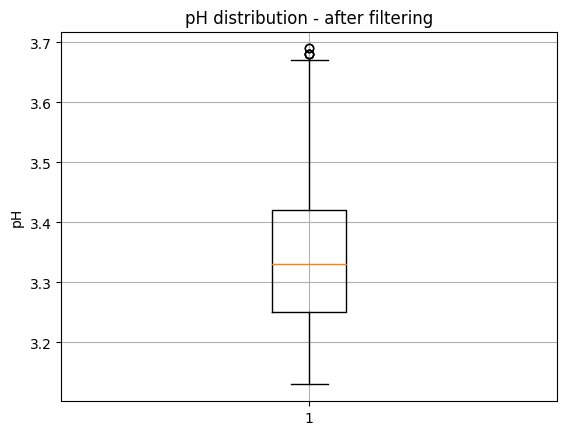

In [ ]:
pH = data_filtered['pH']
plt.boxplot(pH)
plt.title('pH distribution - after filtering')
plt.ylabel('pH')
plt.grid()
plt.show()

---
#**Task 3.4**
Implement the exclusion of specific parts of data based on other selected
features. Consider which features might be reasonable and explore other statistical
measures.

**Density marked as a target.**

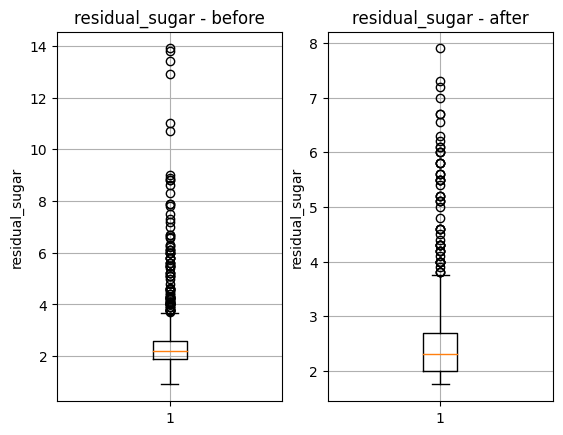

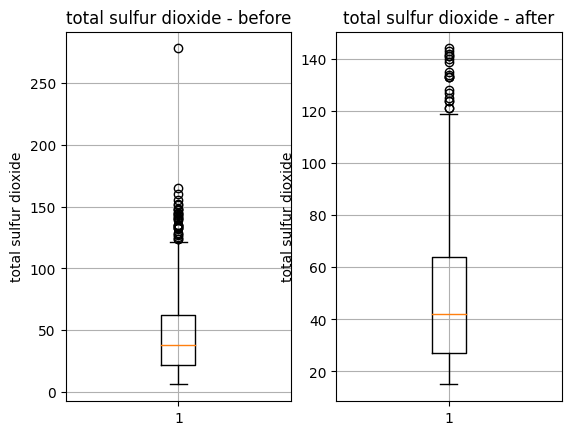

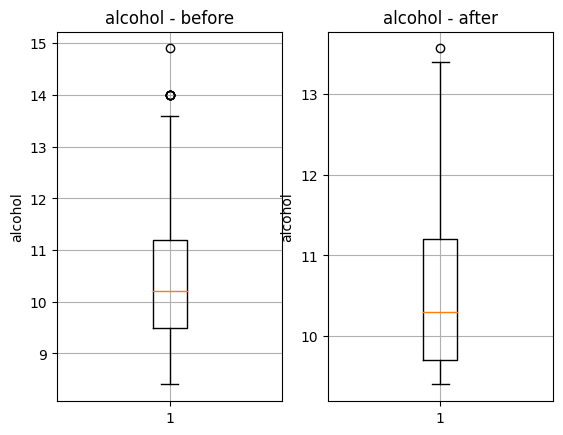

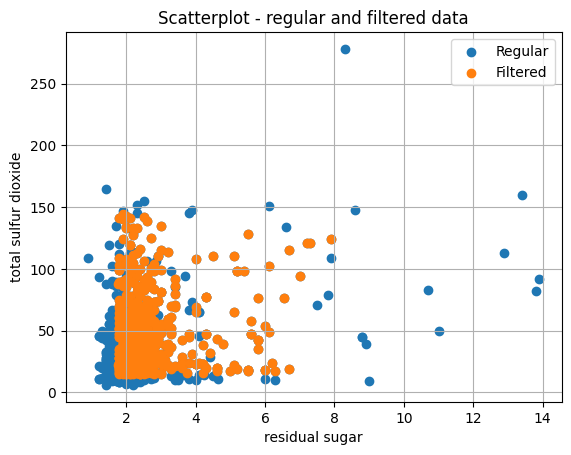

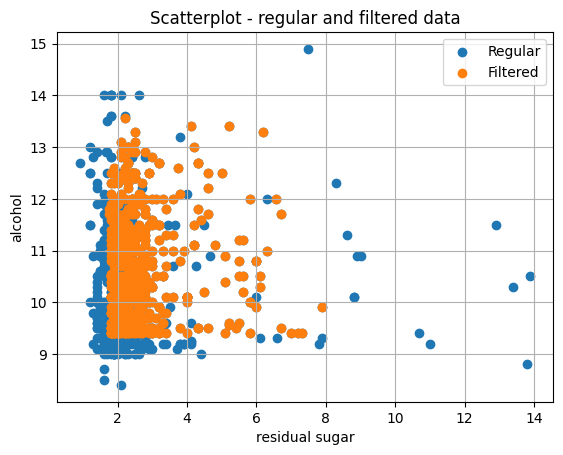

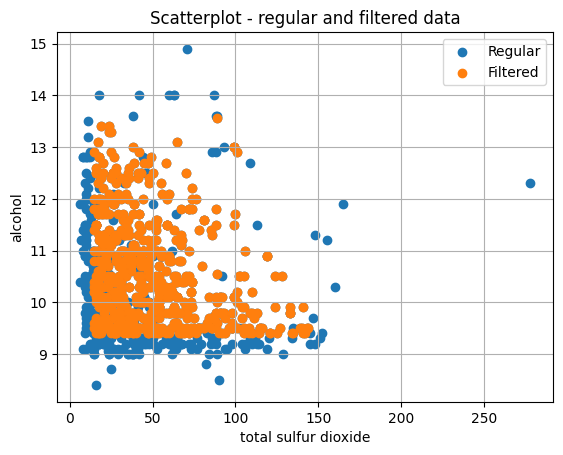

In [23]:
# density is the target
# filtering potential features

# residual sugar
q_low = tr_data['residual sugar'].quantile(0.1) # get 1st percentile
q_hi = tr_data['residual sugar'].quantile(0.99) # get 99th percentile
data_filtered = tr_data[(tr_data['residual sugar'] < q_hi) & (tr_data['residual sugar'] > q_low)]

# total sulfur dioxide
q_low = data_filtered['total sulfur dioxide'].quantile(0.1) # get 1st percentile
q_hi = data_filtered['total sulfur dioxide'].quantile(0.99) # get 99th percentile
data_filtered = data_filtered[(data_filtered['total sulfur dioxide'] < q_hi) & (data_filtered['total sulfur dioxide'] > q_low)]

# alcohol
q_low = data_filtered['alcohol'].quantile(0.1) # get 1st percentile
q_hi = data_filtered['alcohol'].quantile(0.99) # get 99th percentile
data_filtered = data_filtered[(data_filtered['alcohol'] < q_hi) & (data_filtered['alcohol'] > q_low)]


# residual sugar
fig = plt.figure()
fig.add_subplot(1,2,1)
residual_sugar = tr_data['residual sugar']
plt.boxplot(residual_sugar)
plt.title('residual_sugar - before')
plt.ylabel('residual_sugar')
plt.grid()
fig.add_subplot(1,2,2)
residual_sugar = data_filtered['residual sugar']
plt.boxplot(residual_sugar)
plt.title('residual_sugar - after')
plt.ylabel('residual_sugar')
plt.grid()

plt.show()

# total sulfur dioxide
fig = plt.figure()
fig.add_subplot(1,2,1)
total_sulfur_dioxide = tr_data['total sulfur dioxide']
plt.boxplot(total_sulfur_dioxide)
plt.title('total sulfur dioxide - before')
plt.ylabel('total sulfur dioxide')
plt.grid()
fig.add_subplot(1,2,2)
total_sulfur_dioxide = data_filtered['total sulfur dioxide']
plt.boxplot(total_sulfur_dioxide)
plt.title('total sulfur dioxide - after')
plt.ylabel('total sulfur dioxide')
plt.grid()

plt.show()

# alcohol
fig = plt.figure()
fig.add_subplot(1,2,1)
alcohol = tr_data['alcohol']
plt.boxplot(alcohol)
plt.title('alcohol - before')
plt.ylabel('alcohol')
plt.grid()
fig.add_subplot(1,2,2)
alcohol = data_filtered['alcohol']
plt.boxplot(alcohol)
plt.title('alcohol - after')
plt.ylabel('alcohol')
plt.grid()

plt.show()

# residual sugar | total sulfur dioxide
fig = plt.figure()
plt.scatter(tr_data['residual sugar'], tr_data['total sulfur dioxide'], label='Regular')
plt.scatter(data_filtered['residual sugar'], data_filtered['total sulfur dioxide'], label='Filtered')
plt.title('Scatterplot - regular and filtered data')
plt.xlabel('residual sugar')
plt.ylabel('total sulfur dioxide')
plt.legend()
plt.grid()
plt.show()

# residual sugar | alcohol
fig = plt.figure()
plt.scatter(tr_data['residual sugar'], tr_data['alcohol'], label='Regular')
plt.scatter(data_filtered['residual sugar'], data_filtered['alcohol'], label='Filtered')
plt.title('Scatterplot - regular and filtered data')
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.legend()
plt.grid()
plt.show()

# total sulfur dioxide | alcohol
fig = plt.figure()
plt.scatter(tr_data['total sulfur dioxide'], tr_data['alcohol'], label='Regular')
plt.scatter(data_filtered['total sulfur dioxide'], data_filtered['alcohol'], label='Filtered')
plt.title('Scatterplot - regular and filtered data')
plt.xlabel('total sulfur dioxide')
plt.ylabel('alcohol')
plt.legend()
plt.grid()
plt.show()

---
#**Task 3.5**
Check the feature value ranges and their distributions. Determine which features’
distributions are similar and which differ. Consider the possible sources of similarities and
differences in feature distributions.

Hint: check what happens when you type:
data.hist() or data.boxplot().

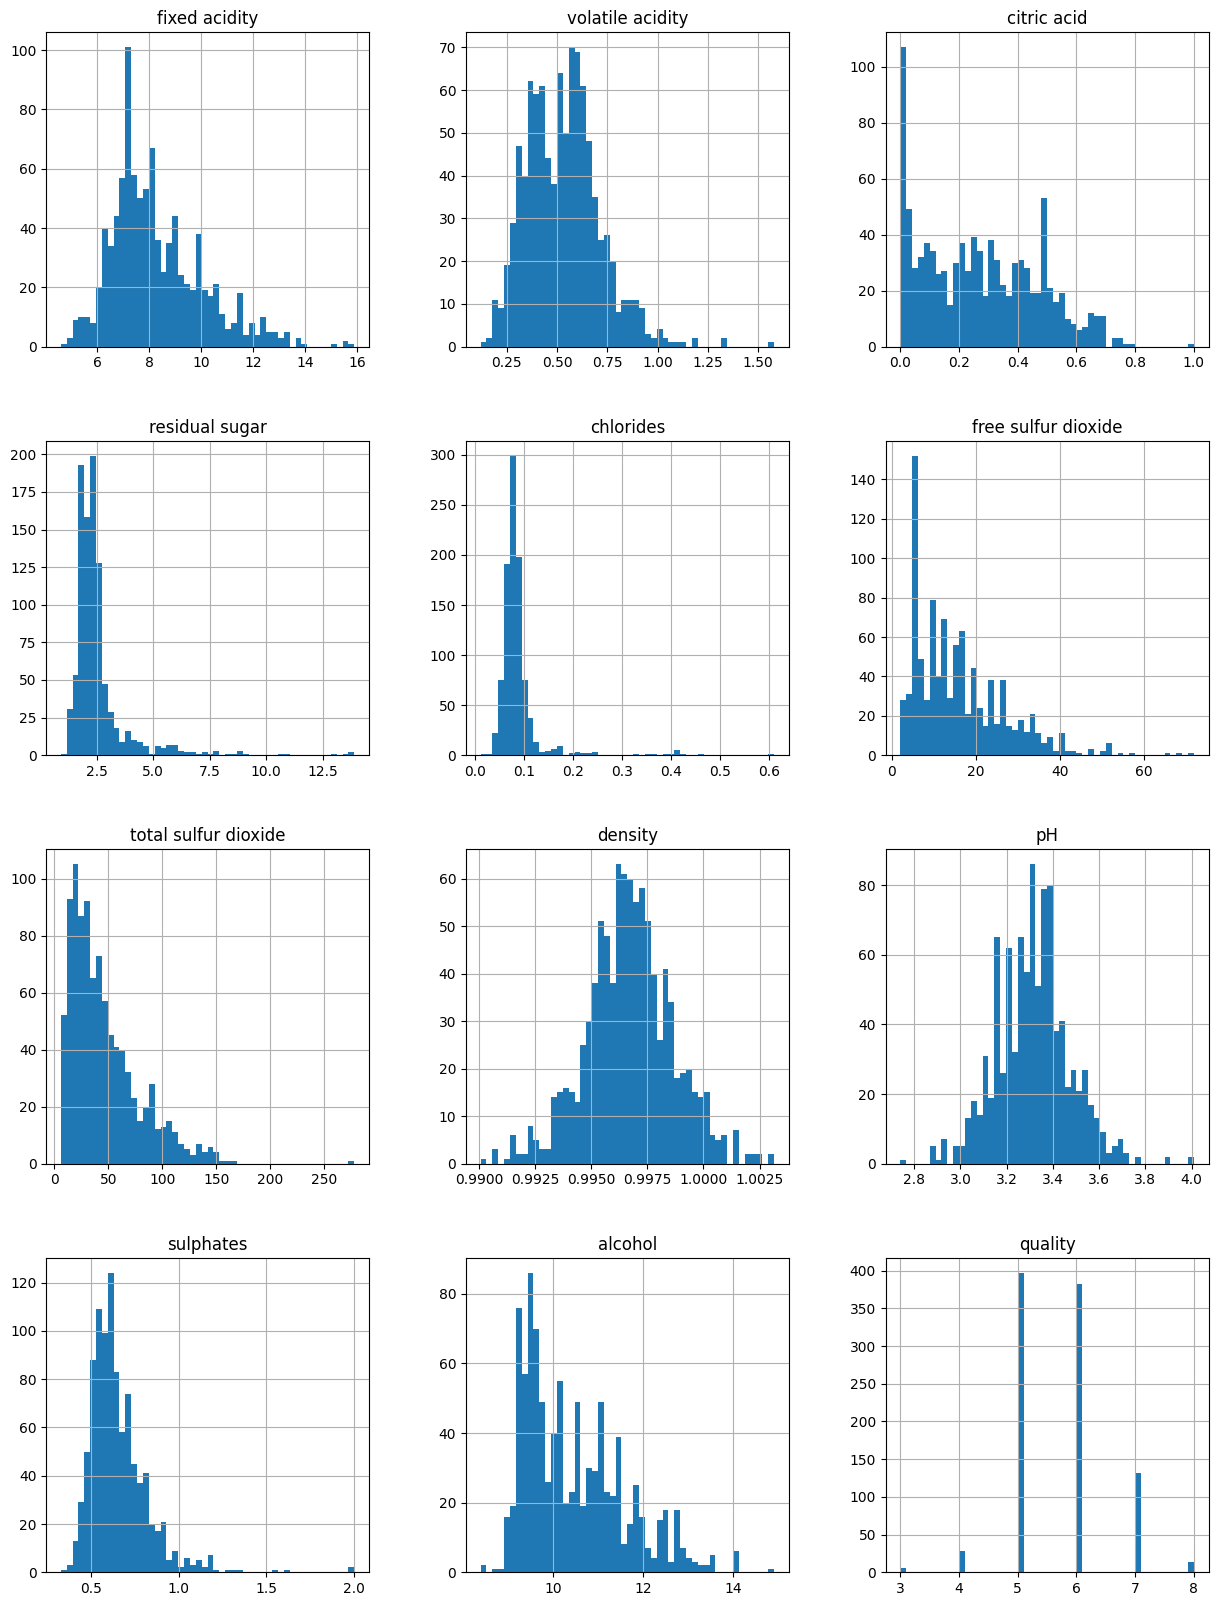

In [ ]:
tr_data.hist(figsize=(15,20), bins=50)
plt.show()

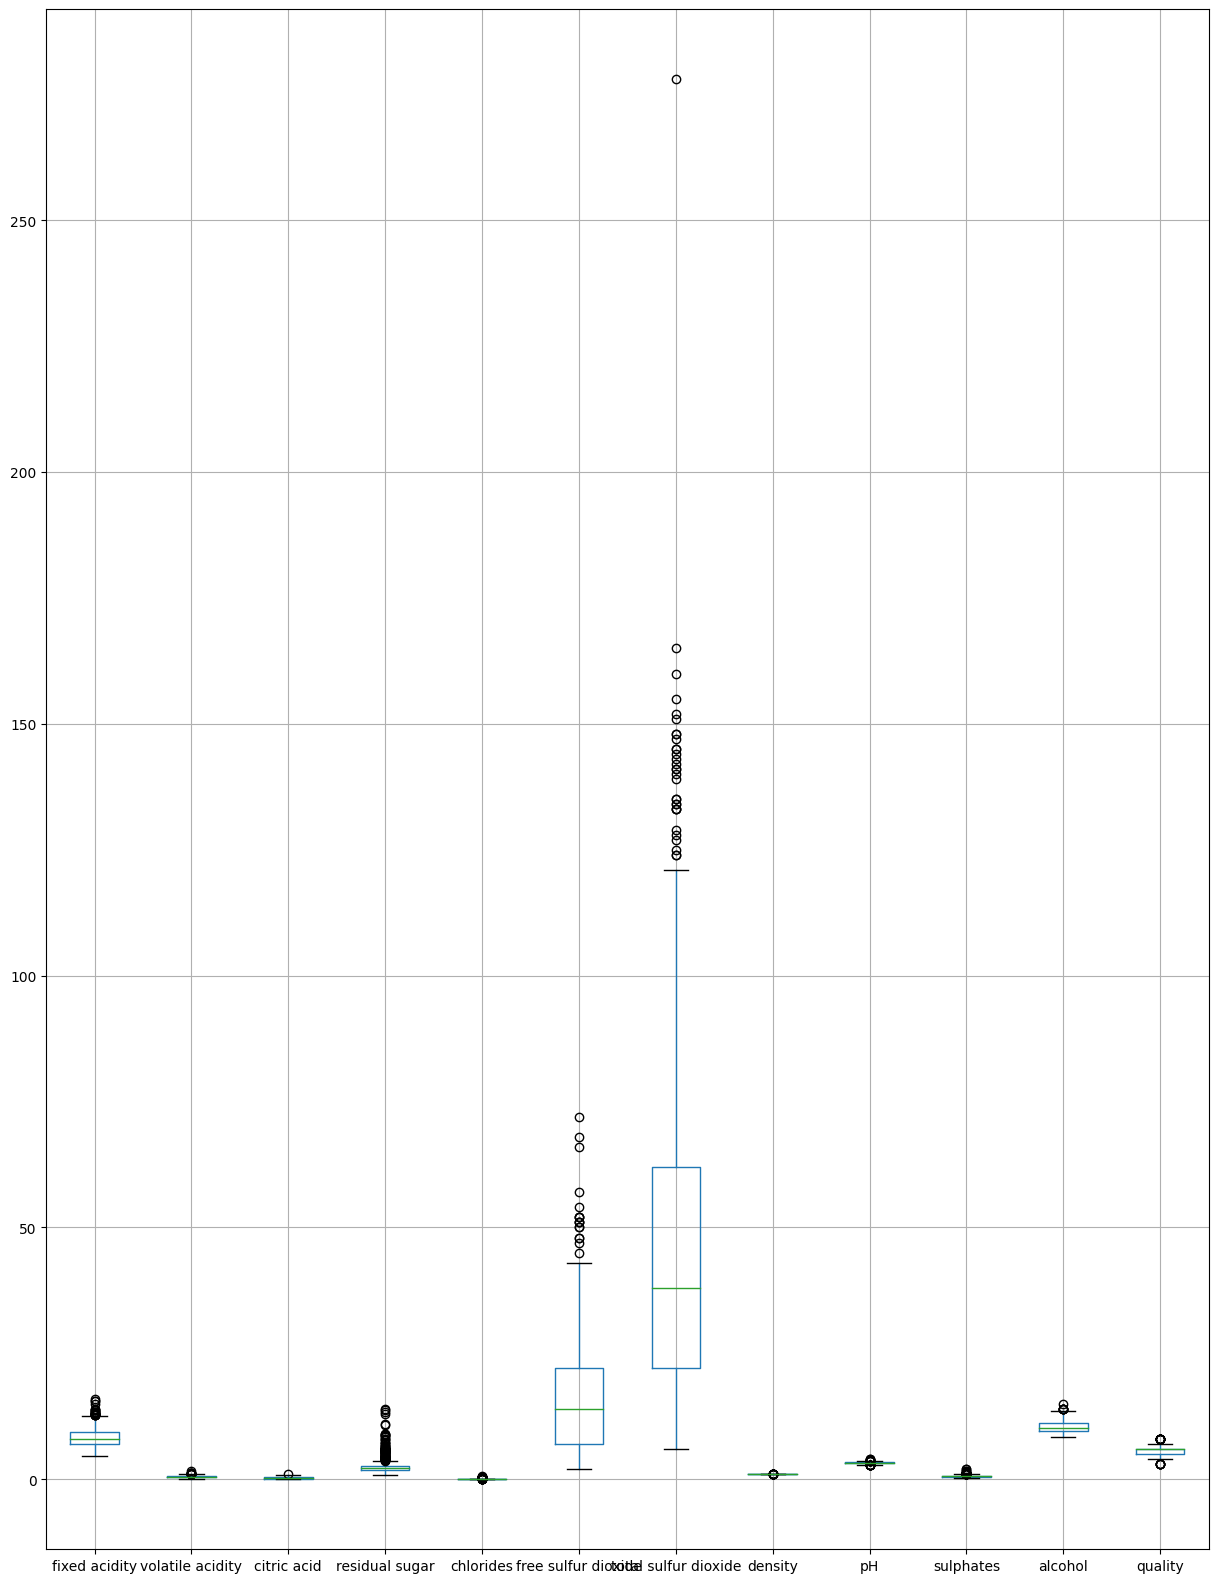

In [ ]:
tr_data.boxplot(figsize=(15,20))
plt.show()

**Similarities:**

*   Acids (same units)
*   Sulfur dioxides (same units)

**Differecnes:**

*   Quality (undeclared unit)


---
#**Task 3.6**
Perform standardization and Min-Max scaling on the training data. Compare
feature distributions as in the previous task. Consider in which cases standardization
should be used and when Min-Max scaling is more appropriate.*kursywa*

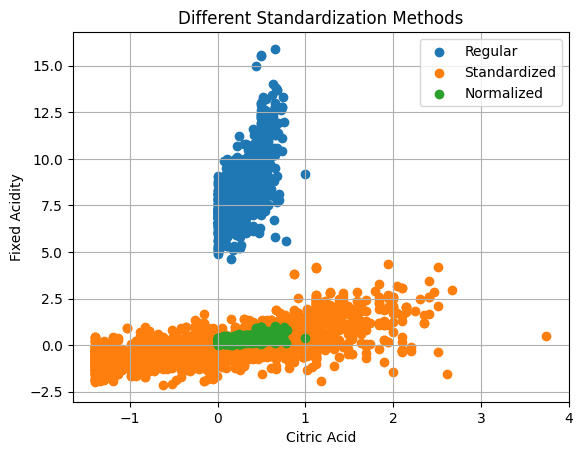

In [ ]:
quality = tr_data['quality']
data_to_standarize = data.drop(columns = ['quality'])

standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized = standard_scaler.fit_transform(data_to_standarize)
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
data_normalized = minmax_scaler.fit_transform(data_to_standarize)

fig = plt.figure()
plt.scatter(tr_data['citric acid'], tr_data['fixed acidity'], label='Regular')
plt.scatter(data_standardized['citric acid'], data_standardized['fixed acidity'], label='Standardized')
plt.scatter(data_normalized['citric acid'], data_normalized['fixed acidity'], label='Normalized')
plt.title('Different Standardization Methods')
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.grid()
plt.show()


### **Min-Maxing**
**Advantages:**

*   Every feature is in the same range (0, 1)
*   Makes it easy to use and interpret

**Disadvantages:**
*   Poorly distributed data is clustered and difficult to distinguish

### **Min-Maxing**
**Advantages:**

*   Makes clustered data well distributed

**Disadvantages:**
*   The range of features may vary

---
#**Task 3.7**
Consider the impact of the outliers on feature scaling. Repeat Task 3.6 after
removing statistical outliers. You may drop 1 or 2 percentiles from the top and bottom of
the selected features.

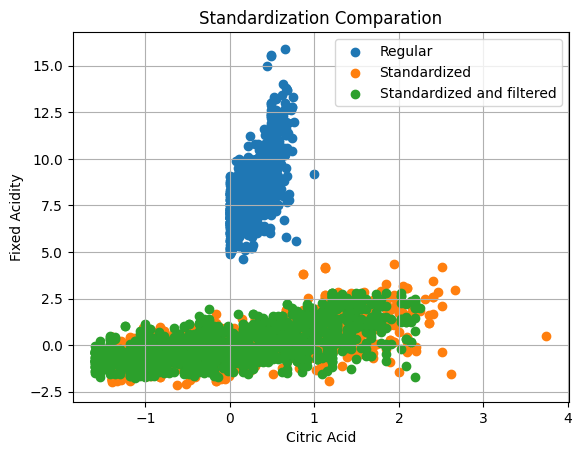

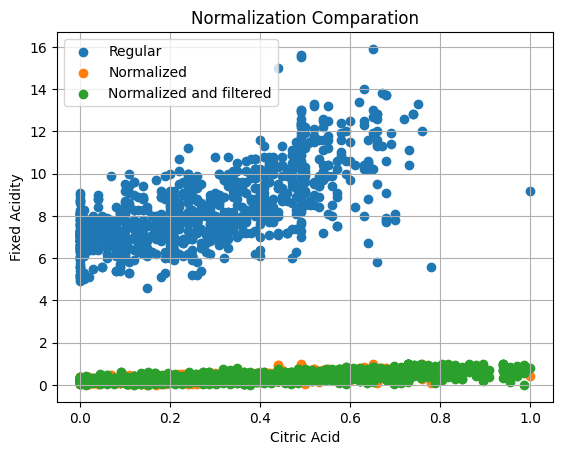

In [24]:
quality = tr_data['quality']
data_to_standarize = data.drop(columns = ['quality'])

# standardize and normalize
standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized = standard_scaler.fit_transform(data_to_standarize)
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
data_normalized = minmax_scaler.fit_transform(data_to_standarize)

# filtering
q_low = data_to_standarize['citric acid'].quantile(0.02) # get 1st percentile
q_hi = data_to_standarize['citric acid'].quantile(0.98) # get 99th percentile
data_to_standarize = data_to_standarize[(data_to_standarize['citric acid'] < q_hi) & (data_to_standarize['citric acid'] > q_low)]

q_low = data_to_standarize['fixed acidity'].quantile(0.02) # get 1st percentile
q_hi = data_to_standarize['fixed acidity'].quantile(0.98) # get 99th percentile
data_to_standarize = data_to_standarize[(data_to_standarize['fixed acidity'] < q_hi) & (data_to_standarize['fixed acidity'] > q_low)]

# standardize and normalize
standard_scaler_f = StandardScaler().set_output(transform="pandas")
data_standardized_f = standard_scaler_f.fit_transform(data_to_standarize)
minmax_scaler_f = MinMaxScaler().set_output(transform="pandas")
data_normalized_f = minmax_scaler_f.fit_transform(data_to_standarize)

fig = plt.figure()
plt.scatter(tr_data['citric acid'], tr_data['fixed acidity'], label='Regular')
plt.scatter(data_standardized['citric acid'], data_standardized['fixed acidity'], label='Standardized')
plt.scatter(data_standardized_f['citric acid'], data_standardized_f['fixed acidity'], label='Standardized and filtered')
plt.title('Standardization Comparation')
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
plt.scatter(tr_data['citric acid'], tr_data['fixed acidity'], label='Regular')
plt.scatter(data_normalized['citric acid'], data_normalized['fixed acidity'], label='Normalized')
plt.scatter(data_normalized_f['citric acid'], data_normalized_f['fixed acidity'], label='Normalized and filtered')
plt.title('Normalization Comparation')
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.grid()
plt.show()

---
#**Task 3.8**
Perform PCA. Plot the first two principal components , and then plot the last two
components. Explore other combinations as well.

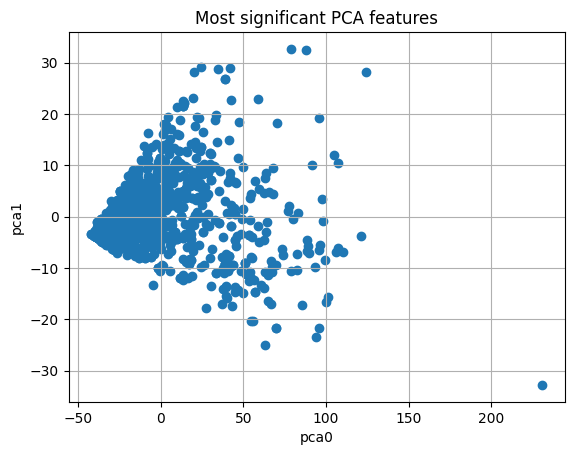

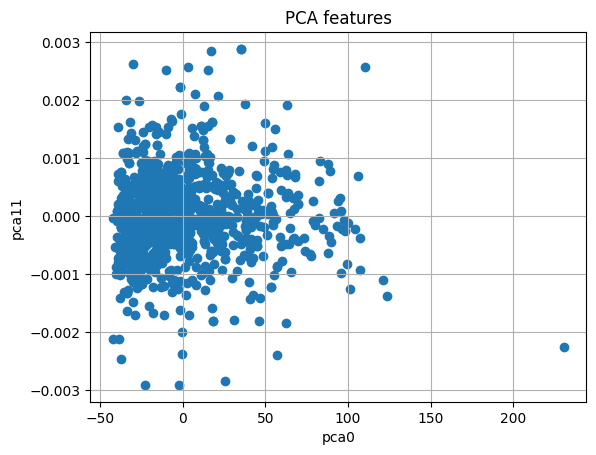

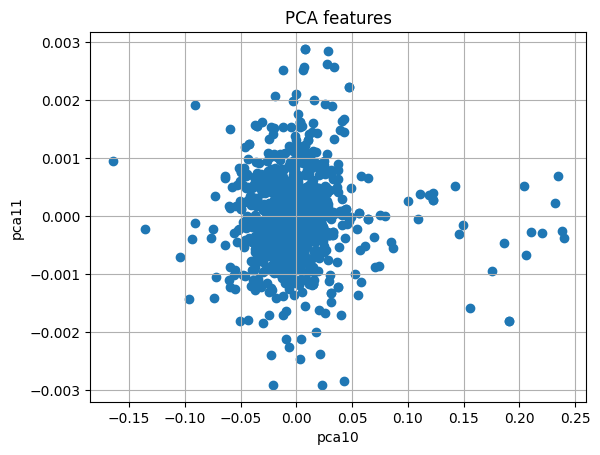

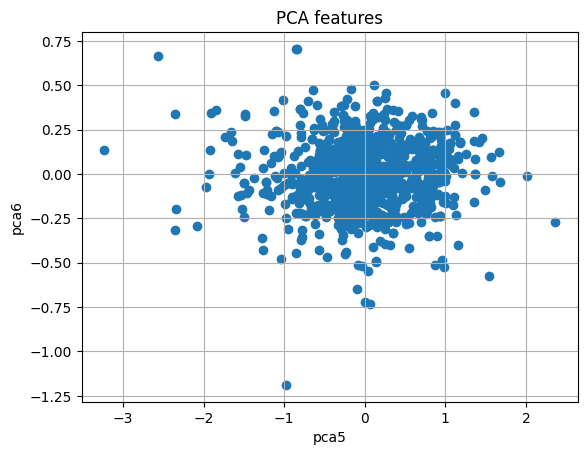

In [28]:
pca = PCA().set_output(transform="pandas").fit(tr_data)
data_pca = pca.transform(tr_data)

fig = plt.figure()
plt.scatter(data_pca['pca0'], data_pca['pca1'])
plt.title('Most significant PCA features')
plt.xlabel('pca0')
plt.ylabel('pca1')
plt.grid()
plt.show()

fig = plt.figure()
plt.scatter(data_pca['pca0'], data_pca['pca11'])
plt.title('PCA features')
plt.xlabel('pca0')
plt.ylabel('pca11')
plt.grid()
plt.show()

fig = plt.figure()
plt.scatter(data_pca['pca10'], data_pca['pca11'])
plt.title('PCA features')
plt.xlabel('pca10')
plt.ylabel('pca11')
plt.grid()
plt.show()

fig = plt.figure()
plt.scatter(data_pca['pca5'], data_pca['pca6'])
plt.title('PCA features')
plt.xlabel('pca5')
plt.ylabel('pca6')
plt.grid()
plt.show()


---
#**Task 3.9**
Apply PCA to the data after feature scaling. How does this impact the PCA results?

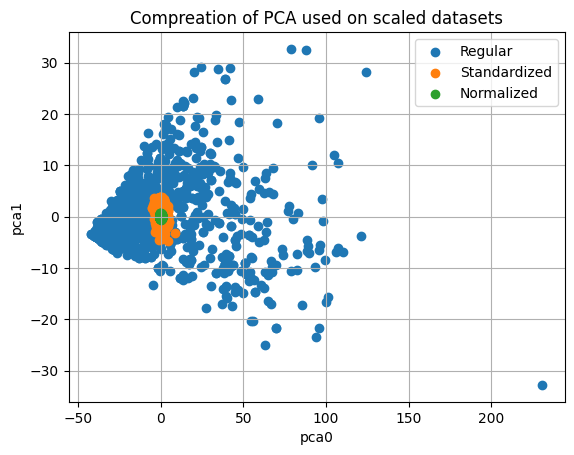

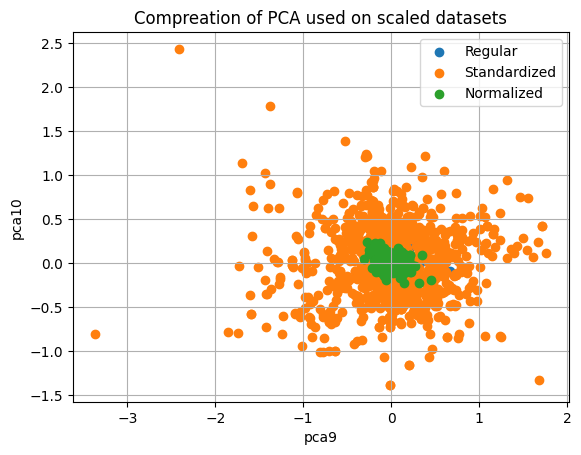

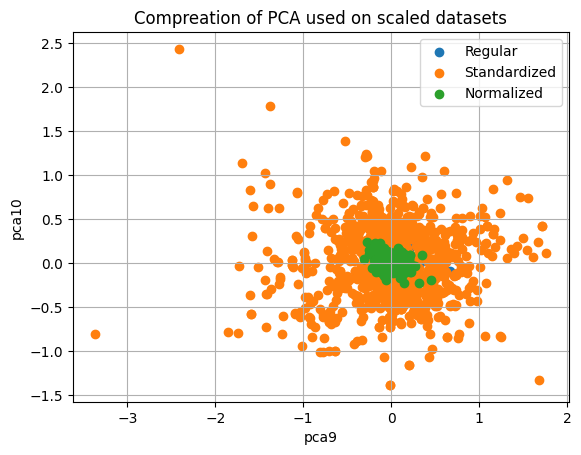

In [35]:
pca_data_to_standarize = PCA().set_output(transform="pandas").fit(data_to_standarize)
data_to_standarize_pca = pca_data_to_standarize.transform(data_to_standarize)

pca_standarized = PCA().set_output(transform="pandas").fit(data_standardized)
data_standardized_pca = pca_standarized.transform(data_standardized)

pca_normalized = PCA().set_output(transform="pandas").fit(data_normalized)
data_normalized_pca = pca_normalized.transform(data_normalized)

fig = plt.figure()
plt.scatter(data_to_standarize_pca['pca0'], data_to_standarize_pca['pca1'], label='Regular')
plt.scatter(data_standardized_pca['pca0'], data_standardized_pca['pca1'], label='Standardized')
plt.scatter(data_normalized_pca['pca0'], data_normalized_pca['pca1'], label='Normalized')
plt.title('Compreation of PCA used on scaled datasets')
plt.xlabel('pca0')
plt.ylabel('pca1')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
plt.scatter(data_to_standarize_pca['pca9'], data_to_standarize_pca['pca10'], label='Regular')
plt.scatter(data_standardized_pca['pca9'], data_standardized_pca['pca10'], label='Standardized')
plt.scatter(data_normalized_pca['pca9'], data_normalized_pca['pca10'], label='Normalized')
plt.title('Compreation of PCA used on scaled datasets')
plt.xlabel('pca9')
plt.ylabel('pca10')
plt.legend()
plt.grid()
plt.show()



---
#**Task 3.10**
First, use the data with outliers removed. Apply standardization or
normalization, and then use PCA. Are there any differences in the results? Did you filter
only the selected features or all of them?

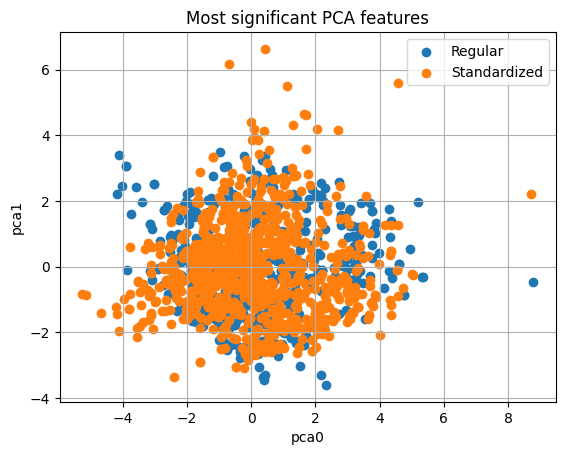

In [36]:

# Filtering data

fresh_data = tr_data.drop(columns = ['quality'])

q_low = fresh_data['free sulfur dioxide'].quantile(0.1) # get 1st percentile
q_hi = fresh_data['free sulfur dioxide'].quantile(0.99) # get 99th percentile
fresh_data = fresh_data[(fresh_data['free sulfur dioxide'] < q_hi) & (fresh_data['free sulfur dioxide'] > q_low)]

q_low = fresh_data['total sulfur dioxide'].quantile(0.1) # get 1st percentile
q_hi = fresh_data['total sulfur dioxide'].quantile(0.99) # get 99th percentile
fresh_data = fresh_data[(fresh_data['total sulfur dioxide'] < q_hi) & (fresh_data['total sulfur dioxide'] > q_low)]

q_low = fresh_data['residual sugar'].quantile(0.1) # get 1st percentile
q_hi = fresh_data['residual sugar'].quantile(0.99) # get 99th percentile
fresh_data = fresh_data[(fresh_data['residual sugar'] < q_hi) & (fresh_data['residual sugar'] > q_low)]

standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized = standard_scaler.fit_transform(fresh_data)

pca = PCA().set_output(transform="pandas").fit(data_standardized)
data_pca = pca.transform(data_standardized)



fresh_data2 = tr_data.drop(columns = ['quality'])

standard_scaler = StandardScaler().set_output(transform="pandas")
data_standardized2 = standard_scaler.fit_transform(fresh_data2)

pca = PCA().set_output(transform="pandas").fit(data_standardized2)
data_pca2 = pca.transform(data_standardized2)



fig = plt.figure()
plt.scatter(data_pca['pca0'], data_pca['pca1'], label='Regular')
plt.scatter(data_pca2['pca0'], data_pca2['pca1'], label='Standardized')
plt.title('Most significant PCA features')
plt.xlabel('pca0')
plt.ylabel('pca1')
plt.legend()
plt.grid()
plt.show()
